<a href="https://colab.research.google.com/github/harleysorkin/Machine-Learning-Final-Project---Sorkin-Harley/blob/main/UK_usedCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()

Saving cars_dataset.csv to cars_dataset.csv


{'cars_dataset.csv': b'model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make\r\n A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi\r\n A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi\r\n A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi\r\n A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi\r\n A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi\r\n A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,audi\r\n A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,audi\r\n A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,audi\r\n A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,audi\r\n A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,audi\r\n A3,2017,16100,Manual,28955,Petrol,145.0,58.9,1.4,audi\r\n A6,2016,16500,Automatic,52198,Diesel,125.0,57.6,2.0,audi\r\n Q3,2016,17000,Manual,44915,Diesel,145.0,52.3,2.0,audi\r\n A3,2017,16400,Manual,21695,Petrol,30.0,58.9,1.4,audi\r\n A6,2015,15400,Manual,47348,Diesel,30.0,61.4,2.0,audi\r\n A3,2017,14500,Automatic,261

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('./cars_dataset.csv')

# Create two new columns for average price and average mpg for each model
df['avgPrice'] = df.groupby('model')['price'].transform('mean').round(2)
df['avgMpg'] = df.groupby('model')['mpg'].transform('mean').round(1)
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0           A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1           A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2           A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3           A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4           A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...        ...   ...    ...          ...      ...      ...    ...   ...   
72430      I30  2016   8680       Manual    25906   Diesel    0.0  78.4   
72431      I40  2015   7830       Manual    59508   Diesel   30.0  65.7   
72432      I10  2017   6830       Manual    13810   Petrol   20.0  60.1   
72433   Tucson  2018  13994       Manual    23313   Petrol  145.0  44.8   
72434   Tucson  2016  15999    Automatic    11472   Diesel  125.0  57.6   

       engineSize     Make  avgPrice  avgMpg  
0             1.4     audi  14327.75    58.7  
1             2.0     audi  22695.39    54.3  
2             1.4     audi  14327.75    58.7  
3             2.0     audi  20255.45    54.4  
4             1.0     audi  17408.52    57.0  
...           ...      ...       ...     ...  
72430         1.6  Hyundai  11609.56    57.7  
72431         1.7  Hyundai  10927.19    60.9  
72432         1.0  Hyundai   7741.87    57.6  
72433         1.6  Hyundai  15818.71    50.3  
72434         1.7  Hyundai  15818.71    50.3  

[72435 rows x 12 columns]

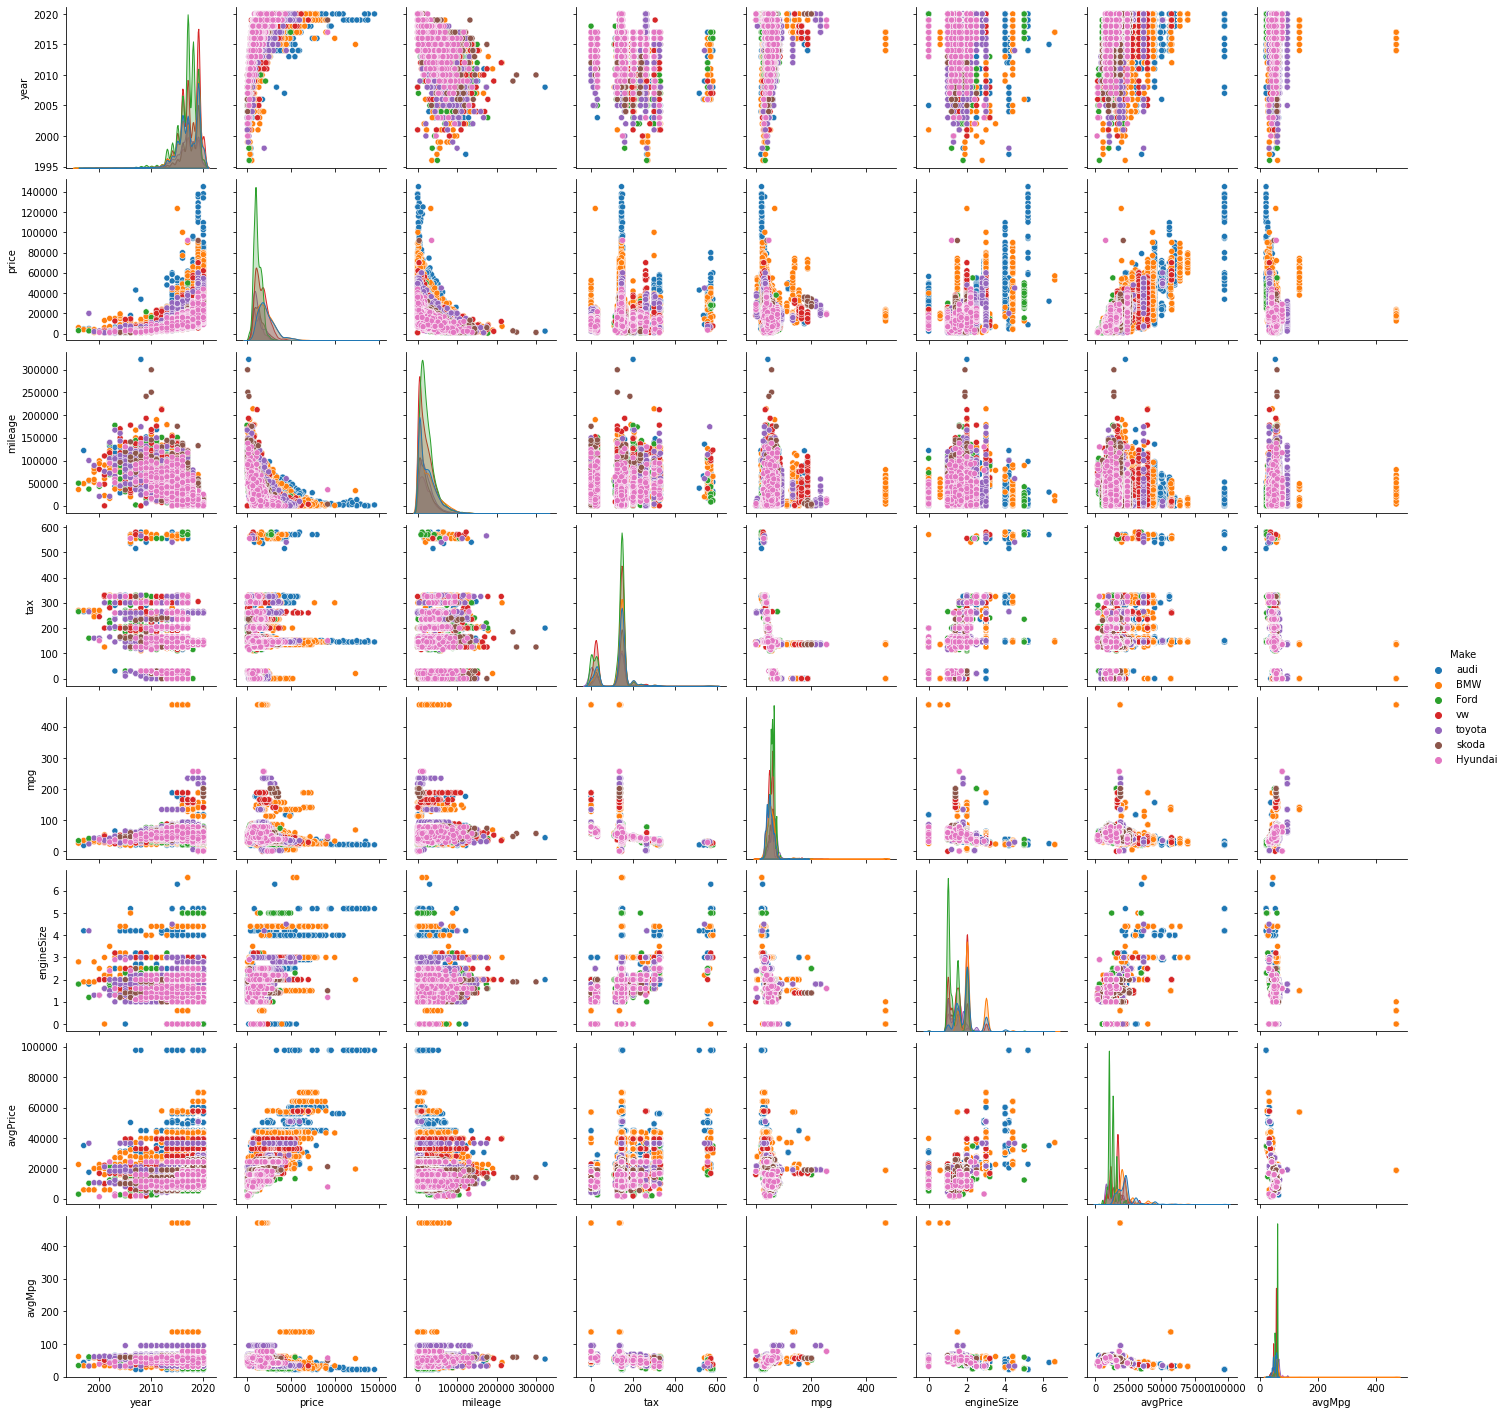

In [44]:
# pairplot of the dataframe, colored by Make
sns.pairplot(df, hue = 'Make')

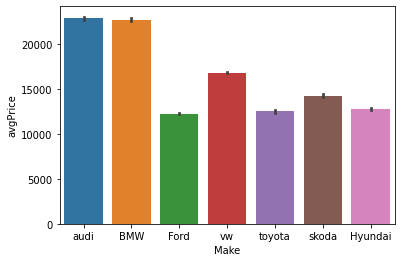

In [47]:
# barplot representing Make vs price
sns.barplot(x = 'Make', y = 'price', data = df)

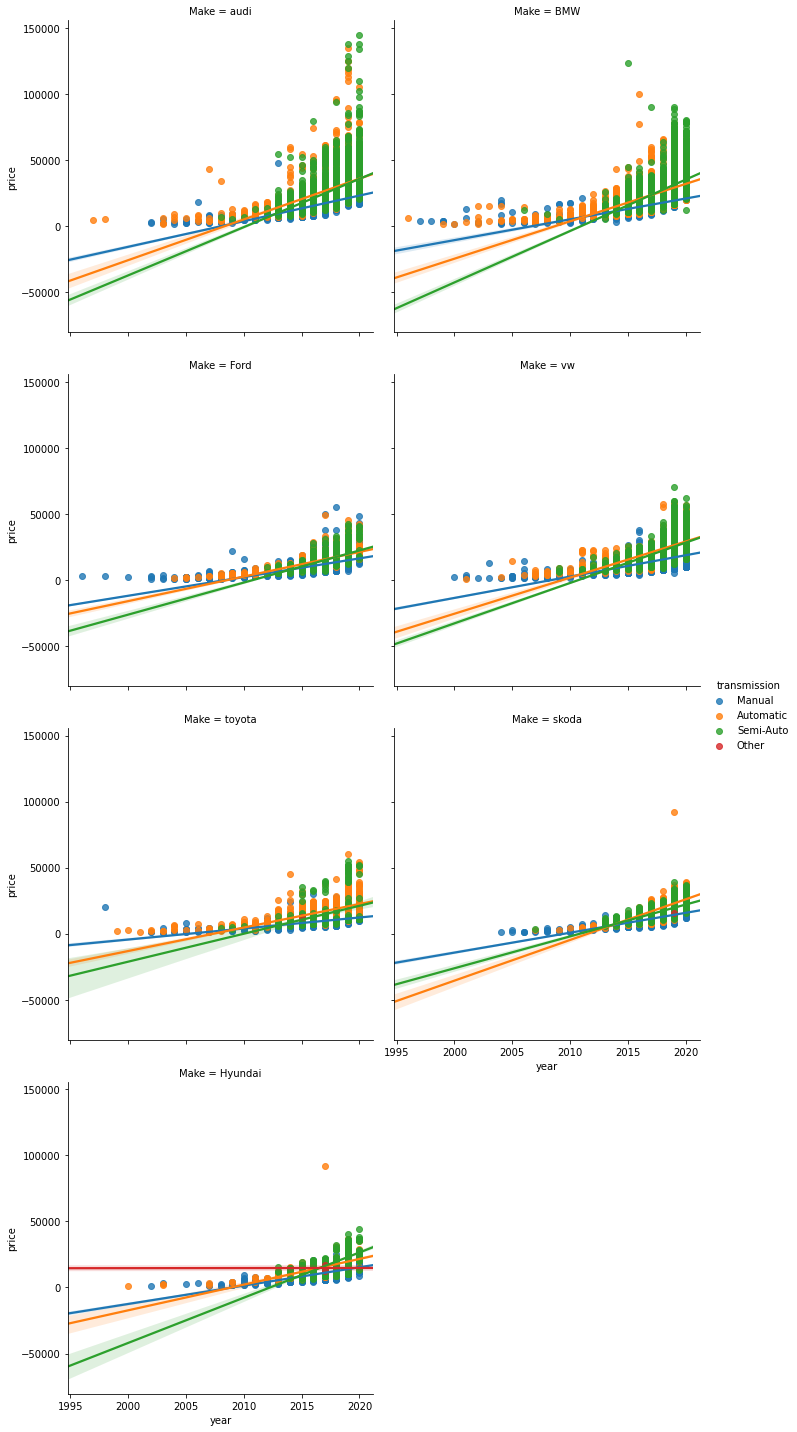

In [48]:
# lmplot of year vs price, separated by Make and colored by transmission type
sns.lmplot(x = 'year', y = 'price', data = df, col = 'Make', hue = 'transmission', truncate = False, height = 5, col_wrap = 2)

# Flatter regression lines indicate more stable resale value of the car the older it is, whereas steeper slopes indicate higher loss in value the older the car.
 

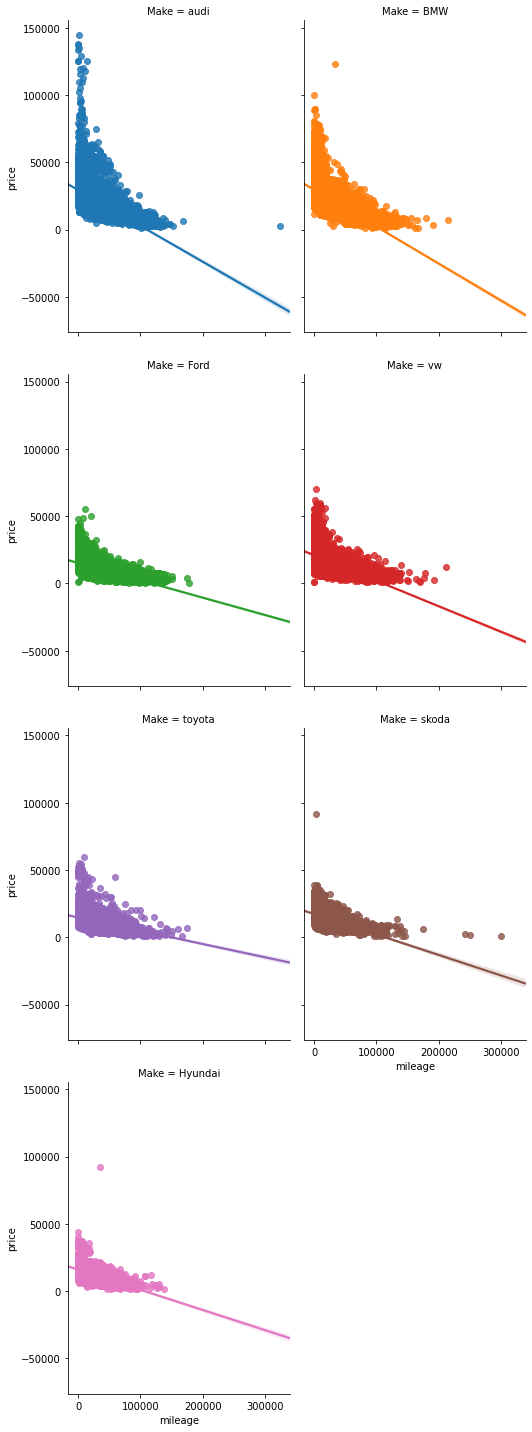

In [42]:
# lmplot of mileage vs price, separated by Make
sns.lmplot(x = 'mileage', y = 'price', data = df, col = 'Make', hue = 'Make', truncate = False, col_wrap = 2, height = 5, aspect = 0.75)

# The flatter the regression line, the more value a car will hold despite higher mileage.

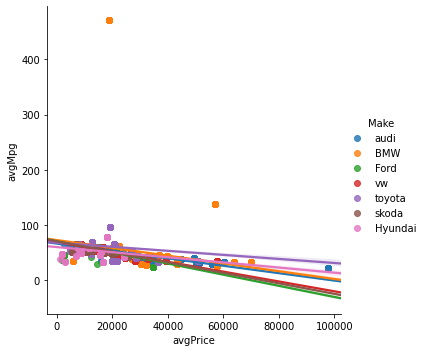

In [54]:
# lmplot of avgPrice (of each model) vs avgMpg (of each model)
sns.lmplot(data = df, x = 'avgPrice', y = 'avgMpg', hue = 'Make', truncate = False)

# Negative regression shows average mpg goes down as the average price goes up.